### Illustration of robust polynomial fitting  
2019-02-28 Jeff Fessler, University of Michigan  

In [1]:
using LinearAlgebra: Diagonal, svd
using Random: seed!
using Plots
include(ENV["HOME"] * "/l/g/teach/w19-598-opt/hw/auto/test/ncg_inv.jl")
using Distributions

In [2]:
s = (t) -> atan(4*(t-0.5)); # nonlinear function

In [3]:
seed!(1) # seed rng
M = 15
tm = sort(rand(M)) # M random sample locations
y = s.(tm) + 0.1 * randn(M); # noisy samples

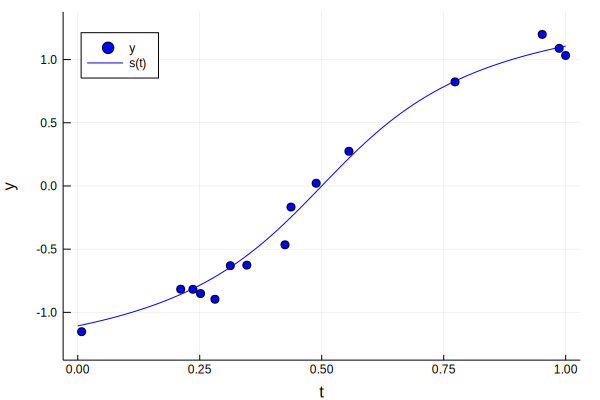

In [4]:
t0 = LinRange(0, 1, 101) # fine sampling for showing curve
scatter(tm, y, color=:blue,
    label="y", xlabel="t", ylabel="y", ylim=[-1.3, 1.3])
plot!(t0, s.(t0), color=:blue, label="s(t)", legend=:topleft)

In [5]:
deg = 3 # polynomial degree
Afun = (tt) -> [t.^i for t in tt, i in 0:deg] # matrix of monomials
A = Afun(tm) # M × 4 matrix

15×4 Array{Float64,2}:
 1.0  0.00790928  6.25568e-5  4.94779e-7
 1.0  0.210968    0.0445076   0.00938968
 1.0  0.236033    0.0557117   0.0131498 
 1.0  0.251662    0.0633339   0.0159387 
 1.0  0.28119     0.0790679   0.0222331 
 1.0  0.312707    0.0977856   0.0305783 
 1.0  0.346517    0.120074    0.0416077 
 1.0  0.424718    0.180385    0.0766128 
 1.0  0.437108    0.191063    0.0835153 
 1.0  0.488613    0.238742    0.116653  
 1.0  0.555751    0.308859    0.171649  
 1.0  0.773223    0.597874    0.46229   
 1.0  0.951916    0.906145    0.862574  
 1.0  0.986666    0.973511    0.96053   
 1.0  0.999905    0.999809    0.999714  

In [6]:
xh = A \ y # ordinary LS solution

4-element Array{Float64,1}:
 -1.1217772852297472
 -0.7987637026605704
  9.106395885988642 
 -6.099750221152859 

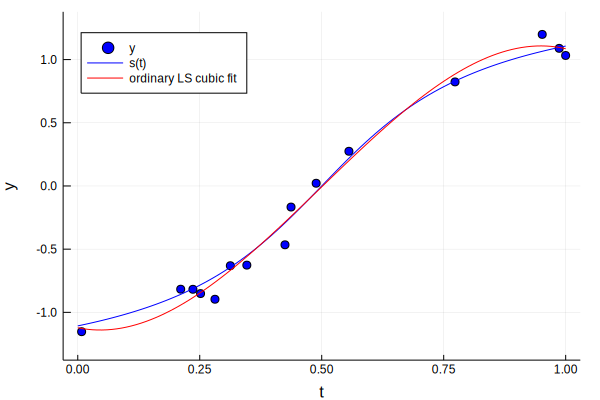

In [7]:
plot!(t0, Afun(t0)*xh, line=:red, label="ordinary LS cubic fit")

In [8]:
yc = copy(y)
yc[12] = -0.5
#seed!(8)
#yc = s.(tm) + 0.2 * rand(Laplace(0,1), M)
xc = A \ yc # ordinary LS solution

4-element Array{Float64,1}:
 -1.3165917881067561
  3.2310676853223086
 -3.94749649713934  
  3.1398714413842437

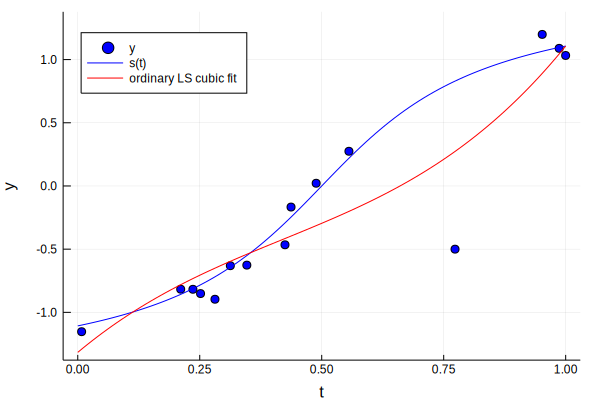

In [9]:
scatter(tm, yc, color=:blue,
    label="y", xlabel="t", ylabel="y", ylim=[-1.3, 1.3])
plot!(t0, s.(t0), color=:blue, label="s(t)", legend=:topleft)
plot!(t0, Afun(t0)*xc, line=:red, label="ordinary LS cubic fit")

In [10]:
delta = 0.01
dpot = (z,delta) -> z / (1 + abs(z)/delta) # Fair potential
xr,_ = ncg_inv([A], [v -> dpot.(v - yc,delta)], [1.], xc, niter=100)

([-1.14924, -0.517269, 8.83346, -6.09636], Any[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

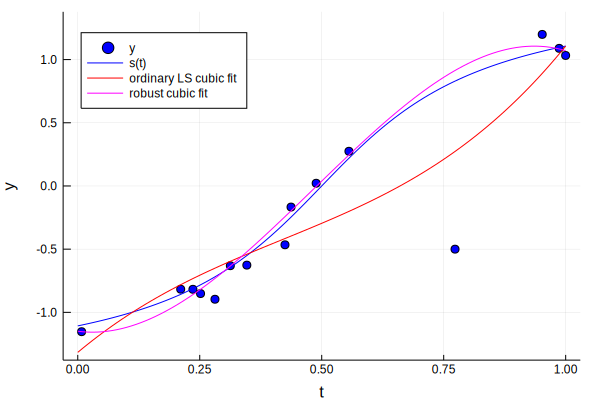

In [11]:
plot!(t0, Afun(t0)*xr, line=:magenta, label="robust cubic fit")

In [12]:
#savefig("tmp.pdf")